## 模仿官方的调用测试

In [1]:
l1 = [1,2,3]
l2 = ["a", "b", "c"]
for i in zip(l1, l2):
    print(i)

(1, 'a')
(2, 'b')
(3, 'c')


In [2]:
!nvidia-smi

Sun Mar  9 14:11:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.07                 Driver Version: 566.07         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   40C    P8              6W /  160W |     660MiB /  16376MiB |     28%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

e:\repos\YOLOv8Core


In [2]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.91 🚀 Python-3.11.5 torch-2.6.0 CPU (Apple M4 Pro)
Setup complete ✅ (14 CPUs, 24.0 GB RAM, 125.8/926.4 GB disk)


In [3]:
from ultralytics import YOLO;
from IPython.display import display, Image;

In [2]:
!yolo task=detect mode=predict model=yolov8x.pt conf=0.25 source='./dog.jpeg' save=False

Ultralytics 8.3.91 🚀 Python-3.11.5 torch-2.6.0 CPU (Apple M4 Pro)
YOLOv8x summary (fused): 112 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs

Traceback (most recent call last):
  File "/opt/anaconda3/envs/hahacar/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/opt/anaconda3/envs/hahacar/lib/python3.11/site-packages/ultralytics/cfg/__init__.py", line 987, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/hahacar/lib/python3.11/site-packages/ultralytics/engine/model.py", line 550, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/hahacar/lib/python3.11/site-packages/ultralytics/engine/predictor.py", line 234, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, n

In [5]:
model = YOLO(f"./weights/yolo12m.pt")
results = model.predict(source='./image/dog.jpeg', conf=0.25, save=False)


image 1/1 /Users/wanfang/repos/YOLOCore/image/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 125.3ms
Speed: 1.7ms preprocess, 125.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


## 检查模型结构+输出结果结构

In [8]:
results[0].__dict__.keys()
# dir(results[0])

dict_keys(['orig_img', 'orig_shape', 'boxes', 'masks', 'probs', 'keypoints', 'obb', 'speed', 'names', 'path', 'save_dir', '_keys'])

In [6]:
results[0].orig_shape,results[0].boxes\
# results[0].names
results[0].boxes.xyxy.cpu().numpy()
results[0].speed

{'preprocess': 1.7131249999238207,
 'inference': 125.34162499991908,
 'postprocess': 1.162249999993037}

In [21]:
[results[0].names[cls] for cls in results[0].boxes.cls.cpu().numpy()]

['dog', 'person', 'car', 'backpack']

In [9]:
model.track(source='./dog.jpeg', persist=True)

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
Retry 1/2 failed: Command 'pip install --no-cache-dir "lapx>=0.5.2" ' returned non-zero exit status 1.
Retry 2/2 failed: Command 'pip install --no-cache-dir "lapx>=0.5.2" ' returned non-zero exit status 1.
requirements:  Command 'pip install --no-cache-dir "lapx>=0.5.2" ' returned non-zero exit status 1.


ModuleNotFoundError: No module named 'lap'

In [10]:
import cv2;
import numpy as np;
import matplotlib.pyplot as plt;
import ultralytics;
import torchvision;
import torch;

device = 'cuda' if torch.cuda.is_available() else 'cpu';
model = torch.load('./weights/yolov8m.pt', map_location=device);
model['model'],model.keys()

(DetectionModel(
   (model): Sequential(
     (0): Conv(
       (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (1): Conv(
       (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (2): C2f(
       (cv1): Conv(
         (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
         (act): SiLU(inplace=True)
       )
       (cv2): Conv(
         (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
         (act): SiLU(inp

In [8]:
model['model'].info()

YOLOv8m summary: 295 layers, 25,902,640 parameters, 0 gradients


(295, 25902640, 0, 0.0)

## 尝试构建基于ultralytics的视频检测框架

In [21]:
import cv2;
import numpy as np;
import matplotlib.pyplot as plt;
import ultralytics;

ultralytics.checks()

from ultralytics import YOLO

model = YOLO('./weights/yolov8m.pt');
results = model.predict(source='crossing.jpg', show=True, save=False);

cv2.waitKey(0);
cv2.destroyAllWindows();

Ultralytics YOLOv8.2.103  Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
Setup complete  (32 CPUs, 31.6 GB RAM, 53.3/512.0 GB disk)

image 1/1 e:\repos\YOLOv8Core\crossing.jpg: 384x640 5 persons, 3 cars, 2 motorcycles, 1 truck, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


In [12]:
im = cv2.imread('deer&dear.jpg');
results = model.predict(im,conf=0.25, show=True);
cv2.waitKey(0);
cv2.destroyAllWindows();
cv2.imwrite('./outputs/deer&dear.jpg',results[0].orig_img);


0: 640x448 1 person, 2 sheeps, 1 cow, 1 backpack, 1 handbag, 77.7ms
Speed: 4.2ms preprocess, 77.7ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 448)


In [9]:
import cv2;
import numpy as np;
import matplotlib.pyplot as plt;
import ultralytics;

ultralytics.checks()

from ultralytics import YOLO

vdo = cv2.VideoCapture("./videos/test.mp4");
model = YOLO("./weights/yolov8m.pt");
count = 0;
fps = 60



while True:
    ret, ori_img = vdo.read();
    
    if not ret:
        break;
    
    result = model.predict(ori_img,conf=0.25, show=True);
    boxes = result[0].boxes
    
    
    key = cv2.waitKey(int(1000/fps));
    
    if key == ord('q'):
        break;
cv2.destroyAllWindows();
    
    # 获取图片
    # img = result.imgs
    # plt.imshow(img);
    # plt.axis("off");
    # plt.show();
    
    # 获取不同的类型与方框位置
    # boxes

Ultralytics YOLOv8.2.103  Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16376MiB)
Setup complete  (32 CPUs, 31.6 GB RAM, 53.3/512.0 GB disk)

0: 384x640 19 persons, 4 bicycles, 2 benchs, 1 handbag, 1 potted plant, 497.2ms
Speed: 20.3ms preprocess, 497.2ms inference, 271.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 persons, 3 bicycles, 1 bench, 1 handbag, 1 potted plant, 59.2ms
Speed: 12.9ms preprocess, 59.2ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 persons, 3 bicycles, 1 bench, 1 handbag, 1 potted plant, 28.8ms
Speed: 16.7ms preprocess, 28.8ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 persons, 3 bicycles, 1 bench, 1 handbag, 1 potted plant, 67.0ms
Speed: 11.6ms preprocess, 67.0ms inference, 9.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 persons, 3 bicycles, 1 handbag, 1 potted plant, 32.5ms
Speed: 6.6ms preprocess, 32.5ms inference, 4.

In [35]:
print(boxes.cls)

tensor([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 26.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 58.,  0.,  0.,  0., 13., 24.,  0.], device='cuda:0')


In [1]:
model['model']

NameError: name 'model' is not defined

### 碰撞线的技术探索

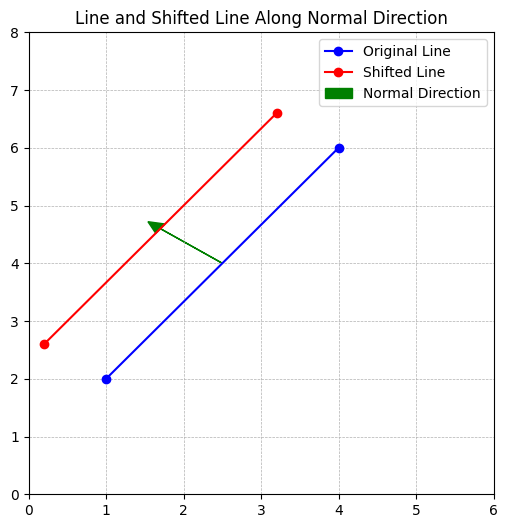

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义两个点的坐标
point1 = np.array([1, 2])
point2 = np.array([4, 6])

# 计算向量
vector = point2 - point1

# 计算法线（逆时针旋转90度）
normal = np.array([-vector[1], vector[0]])
normal = normal / np.linalg.norm(normal)  # 归一化

# 沿法线方向平移
offset = 1  # 平移距离
point1_shifted = point1 + offset * normal
point2_shifted = point2 + offset * normal

# 画图
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', linewidth=0.5)

# 原始向量
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'bo-', label='Original Line')

# 平移后的向量
plt.plot([point1_shifted[0], point2_shifted[0]], [point1_shifted[1], point2_shifted[1]], 'ro-', label='Shifted Line')

# 标注法线方向
midpoint = (point1 + point2) / 2
plt.arrow(midpoint[0], midpoint[1], normal[0], normal[1], head_width=0.2, head_length=0.2, fc='green', ec='green', label='Normal Direction')

plt.legend()
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.title("Line and Shifted Line Along Normal Direction")
plt.show()


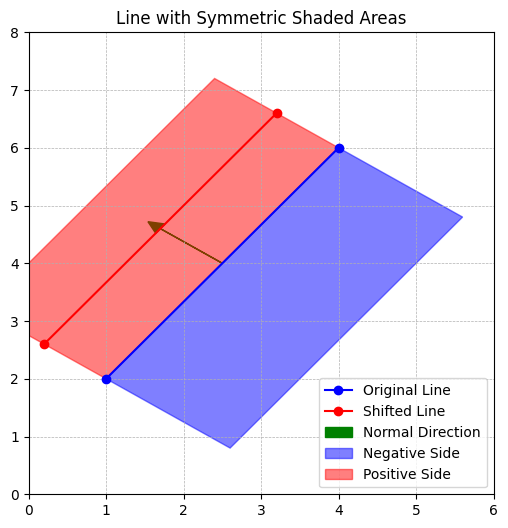

In [4]:
# 计算矩形的四个顶点
width = 2  # 宽度
normal_neg = -normal  # 法线负方向

# 负方向矩形（蓝色半透明）
rect_neg = np.array([
    point1 + width * normal_neg,
    point2 + width * normal_neg,
    point2,
    point1
])

# 正方向矩形（红色半透明）
rect_pos = np.array([
    point1 + width * normal,
    point2 + width * normal,
    point2,
    point1
])

# 画图
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', linewidth=0.5)

# 原始向量
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'bo-', label='Original Line')

# 平移后的向量
plt.plot([point1_shifted[0], point2_shifted[0]], [point1_shifted[1], point2_shifted[1]], 'ro-', label='Shifted Line')

# 标注法线方向
plt.arrow(midpoint[0], midpoint[1], normal[0], normal[1], head_width=0.2, head_length=0.2, fc='green', ec='green', label='Normal Direction')

# 画半透明矩形
plt.fill(rect_neg[:, 0], rect_neg[:, 1], color='blue', alpha=0.5, label='Negative Side')
plt.fill(rect_pos[:, 0], rect_pos[:, 1], color='red', alpha=0.5, label='Positive Side')

plt.legend()
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.title("Line with Symmetric Shaded Areas")
plt.show()


In [9]:
# 选择一个测试点
test_point = np.array([3, 3])

# 判断点是否在负方向矩形（蓝色）内部
def inRealm(point, rect):
    """
    **description**
    判断一个点是否在四边形（矩形）内部。

    **params**
    point : (x, y) 要判断的点
    rect : 4x2 数组，包含矩形四个顶点 (x, y) 按顺时针或逆时针顺序排列

    **returns**
    bool : 点是否在矩形内
    """
    A, B, C, D = rect  # 获取四个顶点
    
    # 计算边向量
    AB = B - A
    AD = D - A
    AP = point - A

    # 计算点在 AB 和 AD 方向上的投影系数
    dotAB = np.dot(AP, AB) / np.dot(AB, AB)
    dotAD = np.dot(AP, AD) / np.dot(AD, AD)

    # 只要两个投影系数都在 [0,1] 之间，则点在矩形内部
    return 0 <= dotAB <= 1 and 0 <= dotAD <= 1

# 验证测试点是否在蓝色矩形内
is_inside = inRealm(test_point, rect_neg)
is_inside


True

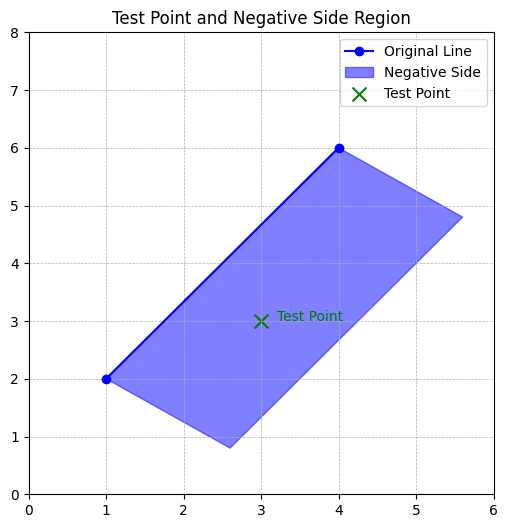

In [10]:
# 画图
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', linewidth=0.5)

# 原始向量
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'bo-', label='Original Line')

# 画半透明蓝色矩形
plt.fill(rect_neg[:, 0], rect_neg[:, 1], color='blue', alpha=0.5, label='Negative Side')

# 绘制测试点
plt.scatter(test_point[0], test_point[1], color='green', s=100, marker='x', label='Test Point')

# 标注测试点
plt.text(test_point[0] + 0.2, test_point[1], "Test Point", fontsize=10, color='green')

plt.legend()
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.title("Test Point and Negative Side Region")
plt.show()


In [ ]:
# coding:utf-8
'''
图像HDR，主要用于暗光照的增强，python实现
创新点：只对缺失光照的地方进行补光增强，而对光照充足的区域影响较小
'''
 
from datetime import datetime
import numpy as np
import cv2
from math import ceil
from scipy.sparse import spdiags
#from scipy.misc import imresize
from scipy.optimize import fminbound
from scipy.stats import entropy
from scipy.sparse.linalg import spsolve
 
filepath = './image/'
 
from PIL import Image
def scipy_misc_imresize(arr, size, interp='bilinear', mode=None):
    #print(arr.dtype)
    #exit()
    #arr = np.uint8(arr)
    im = Image.fromarray(arr, mode=mode)
    ts = type(size)
    if np.issubdtype(ts, np.signedinteger):
        percent = size / 100.0
        size = tuple((np.array(im.size)*percent).astype(int))
    elif np.issubdtype(type(size), np.floating):
        size = tuple((np.array(im.size)*size).astype(int))
    else:
        size = (size[1], size[0])
    func = {'nearest': 0, 'lanczos': 1, 'bilinear': 2, 'bicubic': 3, 'cubic': 3}
    imnew = im.resize(size, resample=func[interp]) # 调用PIL库中的resize函数
    return np.array(imnew)
 
def computeTextureWeights(fin, sigma, sharpness):
    # print(fin)
    # fin = fin / 255.0
 
    dt0_v = np.diff(fin, 1, 0)  # 垂直差分
    dt0_v = np.concatenate((dt0_v, fin[:1, :] - fin[-1:, :]), axis=0)  # 第0行减去最后一行
 
    dt0_h = np.diff(fin, 1, 1)  # 水平差分
    dt0_h = np.concatenate((dt0_h, fin[:, :1] - fin[:, -1:]), axis=1)  # 第0列减去最后一列
 
    gauker_h = cv2.filter2D(dt0_h, -1, np.ones((1, sigma)), borderType=cv2.BORDER_CONSTANT)
    gauker_v = cv2.filter2D(dt0_v, -1, np.ones((sigma, 1)), borderType=cv2.BORDER_CONSTANT)
    # cv2这个filter2D（镜像翻转）与MATLAB的filter2（补0）不同
 
    W_h = 1.0 / (abs(gauker_h) * abs(dt0_h) + sharpness)
    W_v = 1.0 / (abs(gauker_v) * abs(dt0_v) + sharpness)
 
    return W_h, W_v
 
 
def convertCol(tmp):  # 按照列转成列。[[1, 2, 3], [4, 5, 6], [7, 8, 9]] # 转成[147258369].T(竖着)
    return np.reshape(tmp.T, (tmp.shape[0] * tmp.shape[1], 1))

def solveLinearEquation(IN, wx, wy, lambd):
    print('IN', IN.shape)
    r, c, ch = IN.shape[0], IN.shape[1], 1
    k = r * c
    dx = -lambd * convertCol(wx)  # 按列转成一列
    dy = -lambd * convertCol(wy)
    tempx = np.concatenate((wx[:, -1:], wx[:, 0:-1]), 1)  # 最后一列插入到第一列前面
    tempy = np.concatenate((wy[-1:, :], wy[0:-1, :]), 0)  # 最后一行插入到第一行前面
    dxa = -lambd * convertCol(tempx)
    dya = -lambd * convertCol(tempy)
    tempx = np.concatenate((wx[:, -1:], np.zeros((r, c - 1))), 1)  # 取wx最后一列放在第一列，其他为0
    tempy = np.concatenate((wy[-1:, :], np.zeros((r - 1, c))), 0)  # 取wy最后一行放在第一行，其他为0
    dxd1 = -lambd * convertCol(tempx)
    dyd1 = -lambd * convertCol(tempy)
    wx[:, -1:] = 0  # 最后一列置为0
    wy[-1:, :] = 0  # 最后一行置为0
    dxd2 = -lambd * convertCol(wx)
    dyd2 = -lambd * convertCol(wy)
 
    Ax = spdiags(np.concatenate((dxd1, dxd2), 1).T, np.array([-k + r, -r]), k, k)
    Ay = spdiags(np.concatenate((dyd1, dyd2), 1).T, np.array([-r + 1, -1]), k, k)
    # spdiags，与MATLAB不同，scipy是根据行来构造sp，而matlab是根据列来构造sp
 
    D = 1 - (dx + dy + dxa + dya)
    A = (Ax + Ay) + (Ax + Ay).T + spdiags(D.T, np.array([0]), k, k)
 
    A = A / 1000.0  # 需修改
 
    matCol = convertCol(IN)
    print('spsolve开始', str(datetime.now()))
    OUT = spsolve(A, matCol, permc_spec="MMD_AT_PLUS_A")
    print('spsolve结束', str(datetime.now()))
    OUT = OUT / 1000
    OUT = np.reshape(OUT, (c, r)).T
    return OUT
 
 
def tsmooth(I, lambd=0.5, sigma=5, sharpness=0.001):
    # print(I.shape)
    wx, wy = computeTextureWeights(I, sigma, sharpness)
    S = solveLinearEquation(I, wx, wy, lambd)
    return S
 
 
def rgb2gm(I):
    print('I', I.shape)
    # I = np.maximum(I, 0.0)
    if I.shape[2] and I.shape[2] == 3:
        I = np.power(np.multiply(np.multiply(I[:, :, 0], I[:, :, 1]), I[:, :, 2]), (1.0 / 3))
    return I
 
 
def YisBad(Y, isBad):  # 此处需要修改得更高效
    return Y[isBad >= 1]
    # Z = []
    # [rows, cols] = Y.shape
    # for i in range(rows):
    #     for j in range(cols):
    #         if isBad[i, j] >= 122:
    #             Z.append(Y[i, j])
    # return np.array([Z]).T
 
 
def applyK(I, k, a=-0.3293, b=1.1258):
    # print(type(I))
    if not type(I) == 'numpy.ndarray':
        I = np.array(I)
    # print(type(I))
    beta = np.exp((1 - (k ** a)) * b)
    gamma = (k ** a)
    BTF = np.power(I, gamma) * beta
    # try:
    #    BTF = (I ** gamma) * beta
    # except:
    #    print('gamma:', gamma, '---beta:', beta)
    #    BTF = I
    return BTF
 
 
def maxEntropyEnhance(I, isBad, mink=1, maxk=10):
    # Y = rgb2gm(np.real(np.maximum(imresize(I, (50, 50), interp='bicubic') / 255.0, 0)))
    #Y = scipy_misc_imresize(I, (50, 50), interp='bicubic') / 255.0
    #------------------replace-----------------------#
    Y = np.array(Image.fromarray(np.uint8(I)).resize((50,50)))
    Y = rgb2gm(Y)
    # bicubic较为接近
    # Y = rgb2gm(np.real(np.maximum(cv2.resize(I, (50, 50), interpolation=cv2.INTER_LANCZOS4  ), 0)))
    # INTER_AREA 较为接近
    # import matplotlib.pyplot as plt
    # plt.imshow(Y, cmap='gray');plt.show()
 
    print('isBad', isBad.shape)
    #isBad = scipy_misc_imresize(isBad.astype(int), (50, 50), interp='nearest')
        #------------------replace-----------------------#
    isBad = np.array(Image.fromarray(np.uint8(isBad)).resize((50,50)))
    print('isBad', isBad.shape)
 
    # plt.imshow(isBad, cmap='gray');plt.show()
 
    # 取出isBad为真的Y的值，形成一个列向量Y
    # Y = YisBad(Y, isBad)  # 此处需要修改得更高效
    Y = Y[isBad >= 1]
 
    # Y = sorted(Y)
 
    print('-entropy(Y)', -entropy(Y))
 
    def f(k):
        return -entropy(applyK(Y, k))
 
    # opt_k = mink
    # k = mink
    # minF = f(k)
    # while k<= maxk:
    #     k+=0.0001
    #     if f(k)<minF:
    #         minF = f(k)
    #         opt_k = k
    opt_k = fminbound(f, mink, maxk)
    print('opt_k:', opt_k)
    # opt_k = 5.363584
    # opt_k = 0.499993757705
    # optk有问题，fminbound正确，f正确，推测Y不一样导致不对
    print('opt_k:', opt_k)
    J = applyK(I, opt_k) - 0.01
    return J
 
 
def HDR2dark(I, t_our, W):  # 过亮的地方变暗
    W = 1 - W
    I3 = I * W
    isBad = t_our > 0.8
    J3 = maxEntropyEnhance(I, isBad, 0.1, 0.5)  # 求k和曝光图
    J3 = J3 * (1 - W)  # 曝光图*权重
    fused = I3 + J3  # 增强图
    return I
 
 
def oneHDR(I, mu=0.5, a=-0.3293, b=1.1258):
    # mu照度图T的指数，数值越大，增强程度越大
    I = I / 255.0
    t_b = I[:, :, 0]  # t_b表示三通道图转成灰度图（灰度值为RGB中的最大值）,亮度矩阵L
    for i in range(I.shape[2] - 1):  # 防止输入图片非三通道
        t_b = np.maximum(t_b, I[:, :, i + 1])
    # t_b2 = cv2.resize(t_b, (0, 0), fx=0.5, fy=0.5)
    print('t_b', t_b.shape)
    # t_b2 = misc.imresize(t_b, (ceil(t_b.shape[0] / 2), ceil(t_b.shape[1] / 2)),interp='bicubic')
    # print('t_b2', t_b2.shape)
    # t_b2 = t_b / 255.0
 
    #t_b2 = scipy_misc_imresize(t_b, (256, 256), interp='bicubic', mode='F')  # / 255
        #------------------replace-----------------------#
    t_b2 = np.array(Image.fromarray(t_b).resize((256,256)))
    t_our = tsmooth(t_b2)  # 求解照度图T（灰度图）
    print('t_our前', t_our.shape)
    #t_our = scipy_misc_imresize(t_our, t_b.shape, interp='bicubic', mode='F')  # / 255
        #------------------replace-----------------------#
    t_our = np.array(Image.fromarray(t_our).resize((t_b.shape[1],t_b.shape[0])))
    print('t_our后', t_our.shape)
 
    # W: Weight Matrix 与 I2
    # 照度图L（灰度图） ->  照度图L（RGB图）：灰度值重复3次赋给RGB
    # size为(I, 3) ， 防止与原图尺寸有偏差
    t = np.ndarray(I.shape)
    for ii in range(I.shape[2]):
        t[:, :, ii] = t_our
    print('t', t.shape)
 
    W = t ** mu  # 原图的权重。三维矩阵
 
    cv2.imwrite(filepath + 'W.jpg', W * 255)
    cv2.imwrite(filepath + '1-W.jpg', (1 - W) * 255)
    cv2.imwrite(filepath + 't.jpg', t * 255)
    cv2.imwrite(filepath + '1-t.jpg', (1 - t) * 255)
 
    print('W', W.shape)
    # 变暗
    # isBad = t_our > 0.8  # 是高光照的像素点
    # I = maxEntropyEnhance(I, isBad)  # 求k和曝光图
    # 变暗
    I2 = I * W  # 原图*权重
    # 曝光率->k ->J
    isBad = t_our < 0.5  # 是低光照的像素点
    J = maxEntropyEnhance(I, isBad)  # 求k和曝光图
    J2 = J * (1 - W)  # 曝光图*权重
    fused = I2 + J2  # 增强图
    # 存储中间结果
    cv2.imwrite(filepath + 'I2.jpg', I2 * 255.0)
    cv2.imwrite(filepath + 'J2.jpg', J2 * 255.0)
    # 变暗
    # fused = HDR2dark(fused, t_our, W)
    return fused
    # return res
 
def test():
    inputImg = cv2.imread(filepath + 'street.jpg')
    outputImg = oneHDR(inputImg)
    # outputImg = outputImg * 255.0
    cv2.imwrite(filepath + '1out.bmp', outputImg * 255)
    print("HDR完成，已保存到本地")
    print('程序结束', str(datetime.now()))
 
    cv2.imshow('inputImg', inputImg)
    cv2.imshow('outputImg', outputImg)
    # print(inputImg.dtype,outputImg.dtype)
    # outputImg = outputImg.astype(int)
    # print(inputImg.dtype, outputImg.dtype)
    # compare = np.concatenate((inputImg,outputImg),axis=1)
    # cv2.imshow('compare', compare)

 
 
def test2():
    A = np.array([1, 2, 3, 4])
    B = np.array([1, 0, 0, 1])
    print(A[B>0])
 
 
if __name__ == '__main__':
    print('程序开始', str(datetime.now()))
    test()
    key = cv2.waitKey(30000);
    if key == ord("q"):
        cv2.destroyAllWindows();
    cv2.destroyAllWindows()


程序开始 2025-03-22 16:03:32.856335
t_b (360, 642)
IN (256, 256)
spsolve开始 2025-03-22 16:03:32.867250


/var/folders/mn/sbhnrvqd14lc86ntfd0vrnjw0000gn/T/ipykernel_27144/2267654048.py:90: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  OUT = spsolve(A, matCol, permc_spec="MMD_AT_PLUS_A")


spsolve结束 2025-03-22 16:03:33.357281
t_our前 (256, 256)
t_our后 (360, 642)
t (360, 642, 3)
W (360, 642, 3)
I (50, 50, 3)
isBad (360, 642)
isBad (50, 50)
-entropy(Y) nan
opt_k: 4.437694101250946
opt_k: 4.437694101250946
HDR完成，已保存到本地
程序结束 2025-03-22 16:03:33.386642


[ WARN:0@0.809] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
/opt/anaconda3/envs/hahacar/lib/python3.11/site-packages/scipy/optimize/_optimize.py:2389: OptimizeWarning: 
NaN result encountered.
  _endprint(x, flag, fval, maxfun, xatol, disp)
2025-03-22 16:03:33.795 python[27144:914479] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-22 16:03:33.795 python[27144:914479] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2025-03-22 16:03:33.808 python[27144:914479] error messaging the mach port for IMKCFRunLoopWakeUpReliable


: 

In [1]:
import pytesseract;
import cv2;

In [3]:
img = cv2.imread("./image/carb.png");
img.shape

(1048, 1680, 3)

In [4]:
pytesseract.image_to_string(img, lang='chi_sim')

''

Detected Text: !:81355 (Confidence: 0.0431)
The cost of time is 1.4451558589935303


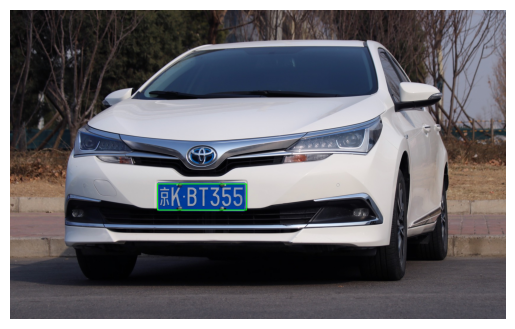

In [75]:

import easyocr
import matplotlib.pyplot as plt
import cv2
import time;
# Initialize the EasyOCR reader
t1 = time.time()
reader = easyocr.Reader(['ch_sim'])  # Specify the languages (e.g., 'en' for English)
t2 = time.time()
# Load the image
image_path = './image/carb.png'  # Path to the image
image = cv2.imread(image_path)
# Perform OCR on the image
result = reader.readtext(image_path)
# Print the detected text and its bounding boxes
for (bbox, text, prob) in result:
    print(f"Detected Text: {text} (Confidence: {prob:.4f})")
    print(f"The cost of time is {t2-t1}")
# Optionally, display the image with bounding boxes around the detected text
for (bbox, text, prob) in result:
    # Unpack the bounding box
    top_left, top_right, bottom_right, bottom_left = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    # Draw a rectangle around the text
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
# Convert the image to RGB (since OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [2]:
from ultralytics import YOLO
import cv2;
m = YOLO("./weights/accdetect.pt");
m

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
import cv2
from ultralytics import YOLO

# Load the trained model
m = YOLO("./weights/accdetect.pt")

# Open the video file or webcam
cap = cv2.VideoCapture("./videos/clip1.mp4")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = m(frame)

    frame = results[0].plot()
    print(results[0].probs)


    cv2.imshow("Accident Detection", frame)
    if cv2.waitKey(30) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 (no detections), 42.2ms
Speed: 1.0ms preprocess, 42.2ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
None

0: 384x640 (no detections), 41.8ms
Speed: 0.8ms preprocess, 41.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
None

0: 384x640 (no detections), 46.1ms
Speed: 0.8ms preprocess, 46.1ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
None

0: 384x640 (no detections), 47.4ms
Speed: 0.6ms preprocess, 47.4ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
None

0: 384x640 (no detections), 45.5ms
Speed: 0.8ms preprocess, 45.5ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
None

0: 384x640 (no detections), 49.7ms
Speed: 0.8ms preprocess, 49.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
None

0: 384x640 (no detections), 46.9ms
Speed: 0.8ms preprocess, 46.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
None

0: 384x640 (no detections), 48.6m

: 

In [1]:
import ultralytics;
from ultralytics import YOLO;
ultralytics.checks();

Ultralytics 8.3.91 🚀 Python-3.11.5 torch-2.6.0 CPU (Apple M4 Pro)
Setup complete ✅ (14 CPUs, 24.0 GB RAM, 341.2/926.4 GB disk)


In [2]:
model = YOLO("./weights/bestforproblem20.pt");
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [3]:
results[0].boxes.conf

NameError: name 'results' is not defined

In [ ]:
result = model.track("./image/cab.jpg", show=True)

2025-04-07 22:50:35.892 python[94726:1316053] error messaging the mach port for IMKCFRunLoopWakeUpReliable


image 1/1 /Users/wanfang/repos/YOLOCore/image/cab.jpg: 480x640 1 bus, 49.3ms
Speed: 4.3ms preprocess, 49.3ms inference, 5.8ms postprocess per image at shape (1, 3, 480, 640)


: 

In [4]:
result[0].boxes, model.names

(ultralytics.engine.results.Boxes object with attributes:
 
 cls: tensor([1., 1.])
 conf: tensor([0.9289, 0.7659])
 data: tensor([[9.7345e+02, 4.0873e+02, 1.5213e+03, 9.7107e+02, 1.0000e+00, 9.2891e-01, 1.0000e+00],
         [9.7178e+02, 6.1877e+02, 1.5245e+03, 9.7377e+02, 2.0000e+00, 7.6593e-01, 1.0000e+00]])
 id: tensor([1., 2.])
 is_track: True
 orig_shape: (1200, 1600)
 shape: torch.Size([2, 7])
 xywh: tensor([[1247.3826,  689.9020,  547.8694,  562.3414],
         [1248.1565,  796.2709,  552.7530,  355.0067]])
 xywhn: tensor([[0.7796, 0.5749, 0.3424, 0.4686],
         [0.7801, 0.6636, 0.3455, 0.2958]])
 xyxy: tensor([[ 973.4479,  408.7313, 1521.3173,  971.0727],
         [ 971.7800,  618.7675, 1524.5330,  973.7742]])
 xyxyn: tensor([[0.6084, 0.3406, 0.9508, 0.8092],
         [0.6074, 0.5156, 0.9528, 0.8115]]),
 {0: 'car', 1: 'bus', 2: 'van', 3: 'truck'})

In [ ]:
model.track("./image/overfit.jpg", show=True)[0].boxes

2025-04-07 10:00:52.568 python[74304:989543] error messaging the mach port for IMKCFRunLoopWakeUpReliable


image 1/1 /Users/wanfang/repos/YOLOCore/image/overfit.jpg: 384x640 2 cars, 35.3ms
Speed: 2.7ms preprocess, 35.3ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.])
conf: tensor([0.9325, 0.9113])
data: tensor([[1.0917e+03, 7.0951e+00, 1.3552e+03, 2.9470e+02, 1.0000e+00, 9.3251e-01, 0.0000e+00],
        [3.2373e+02, 3.7915e+02, 7.4798e+02, 8.6661e+02, 2.0000e+00, 9.1134e-01, 0.0000e+00]])
id: tensor([1., 2.])
is_track: True
orig_shape: (1080, 1920)
shape: torch.Size([2, 7])
xywh: tensor([[1223.4297,  150.8968,  263.5074,  287.6033],
        [ 535.8557,  622.8799,  424.2535,  487.4661]])
xywhn: tensor([[0.6372, 0.1397, 0.1372, 0.2663],
        [0.2791, 0.5767, 0.2210, 0.4514]])
xyxy: tensor([[1091.6760,    7.0951, 1355.1835,  294.6984],
        [ 323.7289,  379.1468,  747.9824,  866.6129]])
xyxyn: tensor([[0.5686, 0.0066, 0.7058, 0.2729],
        [0.1686, 0.3511, 0.3896, 0.8024]])

: 

In [3]:
model.track("./image/test.jpg")[0].boxes


image 1/1 /Users/wanfang/repos/YOLOCore/image/test.jpg: 384x640 2 cars, 25.1ms
Speed: 1.5ms preprocess, 25.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.])
conf: tensor([0.5803, 0.4994])
data: tensor([[2.7096e+02, 6.6325e+02, 5.8329e+02, 7.9486e+02, 1.0000e+00, 5.8025e-01, 0.0000e+00],
        [9.8354e+02, 2.0784e+02, 1.0963e+03, 3.2050e+02, 2.0000e+00, 4.9944e-01, 0.0000e+00]])
id: tensor([1., 2.])
is_track: True
orig_shape: (1080, 1920)
shape: torch.Size([2, 7])
xywh: tensor([[ 427.1246,  729.0529,  312.3313,  131.6154],
        [1039.9150,  264.1721,  112.7554,  112.6632]])
xywhn: tensor([[0.2225, 0.6750, 0.1627, 0.1219],
        [0.5416, 0.2446, 0.0587, 0.1043]])
xyxy: tensor([[ 270.9589,  663.2452,  583.2902,  794.8605],
        [ 983.5374,  207.8405, 1096.2927,  320.5037]])
xyxyn: tensor([[0.1411, 0.6141, 0.3038, 0.7360],
        [0.5123, 0.1924, 0.5710, 0.2968]])

In [75]:
model.track("./image/v97.jpg")[0].boxes


image 1/1 /Users/wanfang/repos/YOLOCore/image/v97.jpg: 384x640 1 car, 1 bus, 22.6ms
Speed: 1.5ms preprocess, 22.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 0.], device='mps:0')
conf: tensor([0.9450, 0.7731], device='mps:0')
data: tensor([[8.0253e+02, 1.9013e+02, 1.1584e+03, 8.7863e+02, 1.0000e+00, 9.4495e-01, 1.0000e+00],
        [5.4644e+02, 4.3762e+02, 8.2877e+02, 8.5667e+02, 2.0000e+00, 7.7314e-01, 0.0000e+00]], device='mps:0')
id: tensor([1., 2.], device='mps:0')
is_track: True
orig_shape: (1080, 1920)
shape: torch.Size([2, 7])
xywh: tensor([[980.4485, 534.3770, 355.8412, 688.5002],
        [687.6062, 647.1464, 282.3257, 419.0563]], device='mps:0')
xywhn: tensor([[0.5107, 0.4948, 0.1853, 0.6375],
        [0.3581, 0.5992, 0.1470, 0.3880]], device='mps:0')
xyxy: tensor([[ 802.5280,  190.1269, 1158.3691,  878.6271],
        [ 546.4434,  437.6183,  828.7691,  856.6746]], device='mps:0')
xyxyn: tensor([[0.4180, 0.1760, 0.6033, 0.8135],
        [0.2846, 0.4052, 0.4317, 0.7932]], device='mps:0')

In [76]:
model.track("./image/crossing.jpg")[0].boxes


image 1/1 /Users/wanfang/repos/YOLOCore/image/crossing.jpg: 384x640 2 cars, 1 bus, 1 van, 28.3ms
Speed: 1.1ms preprocess, 28.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 0., 0., 1.], device='mps:0')
conf: tensor([0.9581, 0.9318, 0.5830, 0.2823], device='mps:0')
data: tensor([[3.4499e+02, 1.0263e+02, 4.2991e+02, 2.2348e+02, 1.0000e+00, 9.5811e-01, 2.0000e+00],
        [4.6708e+02, 7.4344e+01, 5.6315e+02, 1.4867e+02, 2.0000e+00, 9.3178e-01, 0.0000e+00],
        [5.9539e+02, 2.0702e+02, 6.4393e+02, 3.5011e+02, 3.0000e+00, 5.8304e-01, 0.0000e+00],
        [4.1034e+02, 0.0000e+00, 4.5686e+02, 4.1040e+01, 4.0000e+00, 2.8225e-01, 1.0000e+00]], device='mps:0')
id: tensor([1., 2., 3., 4.], device='mps:0')
is_track: True
orig_shape: (363, 644)
shape: torch.Size([4, 7])
xywh: tensor([[387.4471, 163.0524,  84.9229, 120.8456],
        [515.1157, 111.5073,  96.0734,  74.3275],
        [619.6581, 278.5637,  48.5444, 143.0968],
        [433.5973,  20.5202,  46.5164,  41.0404]], device='mps:0')
xywhn: tensor([[0.6016, 0.4492, 0.1319, 0.3329],
        [0.7999, 0.3072, 0.1492, 0.2048],
        [0.

In [5]:
from ultralytics import YOLO;
m = YOLO("./weights/bestforproblem20.pt");

In [6]:
import torch;
torch.set_default_device("mps")


In [7]:
m.track("./image/crossing.jpg", conf=0.7)[0].boxes


image 1/1 /Users/wanfang/repos/YOLOCore/image/crossing.jpg: 384x640 1 car, 1 bus, 1 van, 34.8ms
Speed: 2.7ms preprocess, 34.8ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 0., 1.], device='mps:0')
conf: tensor([0.9368, 0.9128, 0.7425], device='mps:0')
data: tensor([[344.6562, 101.2363, 429.7611, 223.5032,   1.0000,   0.9368,   2.0000],
        [467.3551,  74.4212, 564.2279, 148.0466,   2.0000,   0.9128,   0.0000],
        [409.3860,   0.0000, 454.9276,  39.9675,   3.0000,   0.7425,   1.0000]], device='mps:0')
id: tensor([1., 2., 3.], device='mps:0')
is_track: True
orig_shape: (363, 644)
shape: torch.Size([3, 7])
xywh: tensor([[387.2086, 162.3698,  85.1049, 122.2670],
        [515.7915, 111.2339,  96.8728,  73.6254],
        [432.1568,  19.9837,  45.5415,  39.9675]], device='mps:0')
xywhn: tensor([[0.6013, 0.4473, 0.1322, 0.3368],
        [0.8009, 0.3064, 0.1504, 0.2028],
        [0.6711, 0.0551, 0.0707, 0.1101]], device='mps:0')
xyxy: tensor([[344.6562, 101.2363, 429.7611, 223.5032],
        [467.3551,  74.4212, 564.2279, 148.0466],
        [409.3860,   0.0000, 454.9276,  39.9675]

In [ ]:
m.track("./image/crossing.jpg", conf=0.7)[0].boxes.xywh.to("cpu").numpy()


image 1/1 /Users/wanfang/repos/YOLOCore/image/crossing.jpg: 384x640 1 car, 1 bus, 1 van, 46.5ms
Speed: 1.2ms preprocess, 46.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


array([[     387.21,      162.37,      85.105,      122.27],
       [     515.79,      111.23,      96.873,      73.625],
       [     432.16,      19.984,      45.542,      39.967]], dtype=float32)

: 